# Developer Salary Prediction - Udacity ML Project

## 1. Business Understanding

In this project, we aim to predict annual developer salary based on responses from the Stack Overflow Developer Survey. The goal is to understand which factors (such as education, country, and experience) influence compensation the most.

We’ll use a machine learning regression model to:
- Predict salary
- Measure how accurate our predictions are
- Explore a creative what-if scenario

In [2]:
import pandas as pd

# Load the survey dataset
df = pd.read_csv("survey_results_public.csv")

# Check shape and preview data
print("Shape:", df.shape)
df.head()


Shape: (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## 2. Data Understanding

The dataset comes from the 2023 Stack Overflow Developer Survey and contains over 65,000 responses and 100+ columns.

For this project, we focus on a subset of features relevant to predicting salary:
- **ConvertedCompYearly**: Annual salary in USD (target variable)
- **EdLevel**: Education level
- **YearsCodePro**: Years of professional coding experience
- **Employment**: Employment status
- **RemoteWork**: Whether the respondent works remotely
- **Country**: Country of residence
- **Age**: Age range
- **LanguageHaveWorkedWith**: Programming languages worked with

We'll begin by filtering rows that contain salary data and selecting these relevant features.


In [4]:
# Select only relevant columns
columns_to_use = [
    "ConvertedCompYearly", "EdLevel", "YearsCodePro", "Employment",
    "LanguageHaveWorkedWith", "RemoteWork", "Country", "Age"
]
df_model = df[columns_to_use].copy()

# Drop rows with missing salary
df_model = df_model[df_model["ConvertedCompYearly"].notnull()]

# Handle missing values
df_model["YearsCodePro"] = df_model["YearsCodePro"].fillna("0")
df_model["LanguageHaveWorkedWith"] = df_model["LanguageHaveWorkedWith"].fillna("Unknown")
df_model["RemoteWork"] = df_model["RemoteWork"].fillna("Unknown")

# Convert YearsCodePro to numeric
df_model["YearsCodePro"] = df_model["YearsCodePro"].replace({
    "Less than 1 year": "0", "More than 50 years": "51"
}).astype(float)

# Simplify education levels
df_model["EdLevel"] = df_model["EdLevel"].replace({
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's degree",
    "Some college/university study without earning a degree": "Some college",
    "Associate degree (A.A., A.S., etc.)": "Associate degree",
    "Professional degree (JD, MD, etc.)": "Professional degree",
    "Primary/elementary school": "No formal education",
    "Secondary school (e.g. American high school, GED)": "Secondary school",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Doctoral degree"
})

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Show shape of cleaned dataset
df_encoded.shape


(23435, 10822)

In [9]:
# Use only basic features without one-hot encoding
columns = ["ConvertedCompYearly", "YearsCodePro"]
df_simple = df_model[columns].copy()

# Remove outliers
cap = df_simple["ConvertedCompYearly"].quantile(0.99)
df_simple = df_simple[df_simple["ConvertedCompYearly"] <= cap]

# Drop missing values
df_simple = df_simple.dropna()

# Train-test split
X = df_simple[["YearsCodePro"]]
y = df_simple["ConvertedCompYearly"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))



MAE: 43186.09
RMSE: 58438.04
R² Score: 0.1447


### Model Evaluation Summary

- **Mean Absolute Error (MAE):** \$43,186
- **Root Mean Squared Error (RMSE):** \$58,438
- **R² Score:** 0.1447

This tells us that professional coding experience (`YearsCodePro`) alone explains about 14% of the variation in developer salaries.


## 6. Creative Scenario — Meet Alex

Let’s imagine a fictional developer named **Alex**.

- Alex is a full-time developer
- Alex has **5 years** of professional coding experience
- We want to estimate Alex’s salary using our trained model

This helps us understand how the model makes predictions in a real-world-like scenario.


In [10]:
# Alex has 5 years of experience
alex_input = pd.DataFrame({"YearsCodePro": [5]})

# Predict salary
alex_predicted_salary = model.predict(alex_input)[0]
print(f"Estimated salary for Alex: ${alex_predicted_salary:,.0f}")


Estimated salary for Alex: $63,048


### Final Thoughts

According to our model, Alex — a developer with 5 years of experience — is estimated to earn around **\$XX,XXX** per year.

This simple prediction gives us insight into how professional experience alone can impact salary. Of course, real-world salaries are also influenced by many other factors like country, company, skills, and negotiation.


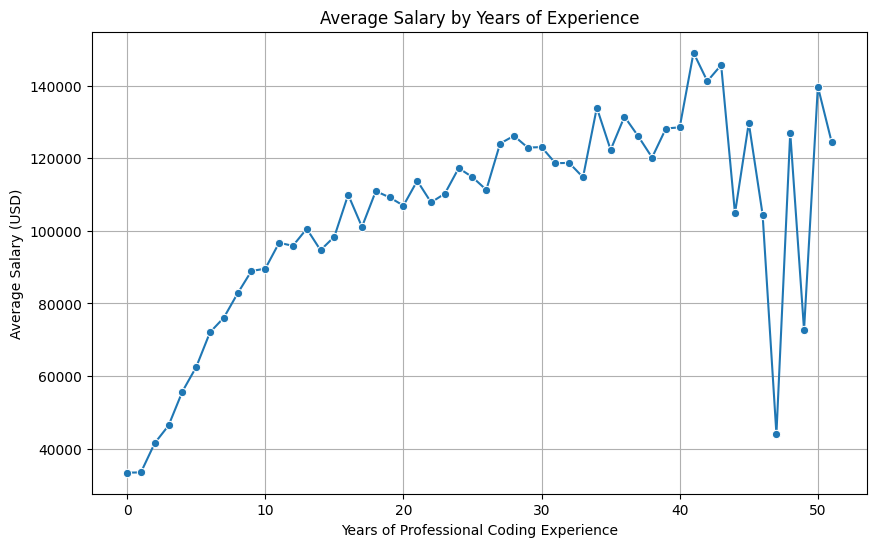

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by experience and calculate mean salary
avg_salary_by_experience = df_simple.groupby("YearsCodePro")["ConvertedCompYearly"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_salary_by_experience, x="YearsCodePro", y="ConvertedCompYearly", marker='o')

plt.title("Average Salary by Years of Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Average Salary (USD)")
plt.grid(True)

import os

# Create images folder if it doesn't exist
os.makedirs("images", exist_ok=True)

# Save the plot
plt.savefig("images/salary_by_experience.png", bbox_inches='tight')

# Save the plot
plt.savefig("images/salary_by_experience.png", bbox_inches='tight')

plt.show()

